In [1]:
%%writefile prueba.py
import os

import numpy as np
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import seaborn as sns

class data_class():

    
    def __init__(self, root="../../"):
        self.root = "../../"
           
    
    def get_csv(self,file):
                
        if file==1:
            self.file='Accidents7904.csv'
        elif file == 2:
            self.file='Vehicles7904.csv'
        elif file== 3:
            self.file='Casualty7904.csv'
            
        self.file = os.path.join(self.root,self.file)
        self.data = self.get_data()
    def get_data(self):
 
        data = pd.read_csv(self.file, delimiter=',',encoding='UTF-8-SIG',low_memory=False)
             
        return data
    
    def info_data(self):
        print("Data_Describe\n",self.data.describe().T)
        #Check encoding file
        import chardet
        with open(self.file, 'rb') as rawdata:
            result = chardet.detect(rawdata.read(10000))
        print(result)
        
    def 
       
        return

Overwriting prueba.py


In [2]:
from prueba import data_class

In [3]:
var1 = data_class()


In [12]:
var1

In [4]:
var1.get_csv(3)

In [62]:
var1.get_data()

In [5]:
var1.info_data()

Data_Describe
                                         count       mean        std  min  25%  \
Vehicle_Reference                   8264687.0   1.409508   0.687647  0.0  1.0   
Casualty_Reference                  8264687.0   1.431801   1.461825  0.0  1.0   
Casualty_Class                      8264687.0   1.599326   0.754204  1.0  1.0   
Sex_of_Casualty                     8264687.0   1.397635   0.492329 -1.0  1.0   
Age_Band_of_Casualty                8264687.0   5.603401   2.437791 -1.0  4.0   
Casualty_Severity                   8264687.0   2.798114   0.435357  1.0  3.0   
Pedestrian_Location                 8264687.0   0.855259   2.090907 -1.0  0.0   
Pedestrian_Movement                 8264687.0   0.536895   1.612887 -1.0  0.0   
Car_Passenger                       8264687.0   0.297970   0.615665 -1.0  0.0   
Bus_or_Coach_Passenger              8264687.0   0.088092   0.555045 -1.0  0.0   
Pedestrian_Road_Maintenance_Worker  8264687.0  -0.164345   0.370588 -1.0  0.0   
Casualty_Type

In [6]:
var1.data

NameError: name 'var1' is not defined

In [29]:
class ml_score():

    
    def __init__(self,data,root="../../"):
        self.root = "../../"
        self.data=data
        
    def cat_num(self):
        for i in self.data.columns:
            if i == 'Age_of_Vehicle' or i == 'Engine_Capacity_(CC)':
                self.data[i] = self.data[i].astype('int64')
            else:
                self.data[i] = self.data[i].astype('str')
        return

    def calculate_vif(self,X, thresh=5.0):
        from statsmodels.stats.outliers_influence import variance_inflation_factor  
        variables = list(range(X.shape[1]))
        dropped = True
        while dropped:
            dropped = False
            vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
                   for ix in range(X.iloc[:, variables].shape[1])]

            maxloc = vif.index(max(vif))
            if max(vif) > thresh:
                print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                      '\' at index: ' + str(maxloc))
                del variables[maxloc]
                dropped = True

        print('Remaining variables:')
        print(X.columns[variables])
        return X.iloc[:, variables]


    def vtypes(self):
        cat = self.data.select_dtypes('object').columns
        num = self.data.select_dtypes('float64').columns
        return cat,num


    def lencoder(self):
        lenc = LabelEncoder()
        self.data[cat] = self.data[cat].apply(lenc.fit_transform)
        self.data['Accident_Severity'] = lenc.fit_transform(self.data['Accident_Severity'])
        return df_imbalanced


    def target_features(self):
        X = self.data.drop('Accident_Severity', axis=1)
        y = self.data['Accident_Severity']
        return X,y

    def split(self,X,y):
        from sklearn.model_selection import train_test_split

        X_train, X_test, y_train, y_test = train_test_split(X, y)
        return X_train, X_test, y_train, y_test


In [5]:
class modelling_score():
    
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
    from sklearn.compose import ColumnTransformer

    from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                                explained_variance_score,recall_score,f1_score,precision_score,roc_curve,roc_auc_score,\
                                accuracy_score,confusion_matrix, classification_report

    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.neural_network import MLPClassifier

    from sklearn.svm import LinearSVC,SVC

    from sklearn.model_selection import learning_curve
    from sklearn.linear_model import LogisticRegression

    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import LabelEncoder
    from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split,cross_validate
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
    from sklearn.tree import DecisionTreeClassifier

    
    def __init__(self,data,X,y,num,cat):
        self.data = data
        self.X = X
        self.y = y
        self.num = num
        self.cat = cat
        
    
    def fit_pred_mod(self,select_model,folder,LogisticRegression):
          #model selection 
        if select_model == 1:
            model = LogisticRegression(multi_class= "multinomial",solver='lbfgs')
        elif select_model == 2:
            model = DecisionTreeClassifier()
        elif select_model == 3:
            model = RandomForestClassifier()
        elif select_model == 4:
            model = BaggingClassifier()
        elif select_model == 5:
            model = LinearSVC()
        elif select_model == 6:
            model = KNeighborsClassifier()
        elif select_model == 7:
            model = MLPClassifier()
        if folder == 1:
            folder = 'imb_reports'
        elif folder == 2:
            folder = 'bal_reports'
        elif folder == 3:
            folder = 'smote_reports'

        numeric_features = self.num
        categorical_features = self.cat
        #Handling categorical and numerical data with Pipelines
        numeric_transformer = Pipeline(steps=[
        #('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

        #categorical_transformer = LabelEncoder()
        categorical_transformer = OneHotEncoder(handle_unknown='ignore')
        categorical_transformer  = StandardScaler()
        preprocessor = ColumnTransformer(
        transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),])

        X_train, X_test, y_train, y_test = train_test_split(X, y)
        clf = Pipeline(steps=[('preprocessor', preprocessor),
        ('classifier', model)])
        clf.fit(X_train, y_train)
        yhat = clf.predict(X_test)

        eval_score(X_train, X_test, y_train, y_test, clf, yhat,select_model,folder)

        return
    


def eval_score(X_train, X_test, y_train, y_test, classifier,yhat,select_model,folder):
  #  classifier.fit(X_train, y_train)
#    preds = classifier.predict(X_test)
#    probs = classifier.predict_proba(X_test)
    
    if select_model == 1:
        modelts = 'LogisticRegression' # no feature importance
    elif select_model == 2:
        modelts = 'DecisionTreeClassifier'
    elif select_model == 3:
        modelts = 'RandomForestClassifier'
    elif select_model == 4:
        modelts = 'BaggingClassifier' # no feature importance
    elif select_model == 5:
        modelts = 'LinearSVC' # no feature importance
    elif select_model == 6:
        modelts = 'KNeighborsClassifier' # no feature importance
    elif select_model == 7:
        modelts = 'MLPClassifier' # no feature importance
          
  
    n_class = 3
    print("model score: %.3f" % classifier.score(X_test, y_test))
    cr = classification_report(y_test, yhat)
    print(cr)
    
    f = open(folder+'/report_'+modelts+'.txt', 'w')
    f.write('Classification Report {}\n\n{}'.format(modelts ,cr))
    f.close()
    
    if select_model in [1,2,3,4,6,7]:
        # roc curve for classes
        fpr = {}
        tpr = {}
        thresh ={}
        probs = classifier.predict_proba(X_test)
        for i in range(n_class):    
            fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probs[:,i], pos_label=i)
        # plotting    
        plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label='Slight')
        plt.plot(fpr[1], tpr[1], linestyle='--',color='orange', label='Serious')
        plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Fatal')
        plt.title('Multiclass ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='best')
        plt.savefig(folder+'/'+ modelts+'Multiclass ROC',dpi=300);
        roc_auc_score(y_test, probs,multi_class='ovo', average='weighted')
    #plotting matrix confusion
    matrix = confusion_matrix(y_test, yhat)
    dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                            columns=['Fatal', 'Serious', 'Slight'])
    # create heatmap
    fig,ax = plt.subplots()
    ax = sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
    ax = plt.title('Confusion Matrix')
    ax = plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
    plt.show()
    fig.savefig(folder+'/' + modelts +'Confusion Matrix',dpi=300);
    
    if select_model in [2,3]:
    #features importance
        fig,ax = plt.subplots()
        feat_importances = pd.Series(classifier.steps[1][1].feature_importances_, index=features_col)
        feat_importances.sort_values().plot(kind='barh', figsize=(10,5),ax=ax)
        plt.xlabel('Relative Feature Importance with {}'.format(modelts));
        plt.show();
    
    return

Overwriting test0001.py


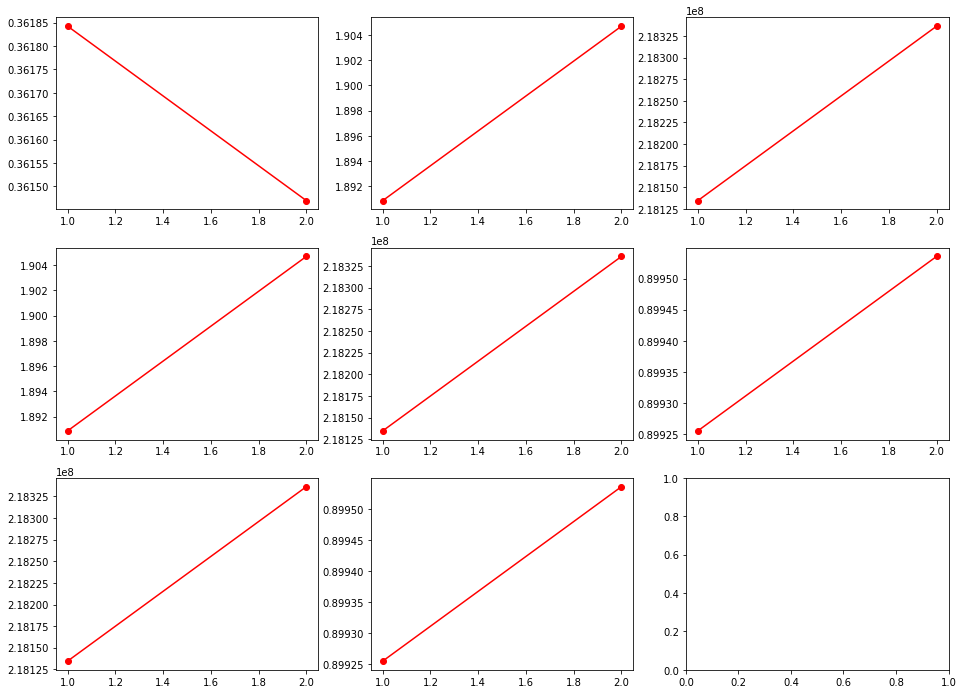

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math

z = {'A': [0.3618426, 0.36146951], 'B': [1.8908799, 1.904695], 'C': [2.1813462e+08, 2.1833622e+08], 'D': [0.89925492, 0.89953589], 'E': [2.6356747, 2.6317911], 'F': [2.2250445e+08, 2.2501808e+08], 'G': [2.0806053e+08, 2.0691238e+08], 'H': [0.37242803, 0.37611806]}
k = [1,2]

cols = 3
rows = math.ceil(len(z) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16,12))

dict_keys = [k for k in z.keys()]

l = 0
for i in range(rows):
    for j in range(cols):
        if len(z) == l:
            break
        else:
            key = dict_keys[i+j]
            axes[i][j].plot(k, [z[key][0],z[key][1]], 'ro-')
        l += 1

plt.show()